In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import gmaps
from config import gkey

In [3]:
state_capitals_csv = "Resources/us-state-capitals.csv"

capitals = pd.read_csv(state_capitals_csv)

capitals

,Name,Capital,latitude,longitude
0,Alabama,Montgomery,32.366800,-86.266670
1,Alaska,Juneau,58.300323,-134.417630
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629
5,Colorado,Denver,39.739227,-104.984856
6,Connecticut,Hartford<br>,41.764046,-72.682198
7,Delaware,Dover,39.157307,-75.519722
8,Hawaii,Honolulu,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296


In [5]:
poverty_by_state_csv = "Resources/poverty_by_state_csv"

poverty_by_state=pd.read_csv(poverty_by_state_csv)

poverty_by_state.head()

,Year,State FIPS,Postal Code,Name,Poverty Estimate All Ages,90% CI Lower Bound,90% CI Upper Bound,Poverty Percent All Ages,90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Poverty Estimate Ages 0-4,90% CI Lower Bound.7,90% CI Upper Bound.7,Poverty Percent Ages 0-4,90% CI Lower Bound.8,90% CI Upper Bound.8
0,2003,1,AL,Alabama,"677,455","644,647","710,263",15.3,14.5,16.0,...,22.5,"36,131","34,659","37,602","72,477","62,361","82,594",24.7,21.3,28.2
1,2003,2,AK,Alaska,"63,126","58,920","67,332",9.8,9.2,10.5,...,12.0,"52,391","50,764","54,018","7,651","6,153","9,148",15.6,12.5,18.6
2,2003,4,AZ,Arizona,"783,005","736,508","829,502",13.9,13.1,14.7,...,21.8,"41,963","40,557","43,368","92,147","75,773","108,522",20.9,17.2,24.7
3,2003,5,AR,Arkansas,"432,240","410,707","453,774",16.0,15.2,16.8,...,23.4,"33,445","31,994","34,895","49,523","42,786","56,260",27.2,23.5,30.9
4,2003,6,CA,California,"4,836,106","4,639,930","5,032,283",13.7,13.2,14.3,...,20.1,"48,440","47,147","49,734","520,311","461,424","579,197",20.0,17.8,22.3


In [17]:
heatmap_poverty_df = pd.merge(poverty_by_state, capitals, on = "Name", how = "left")

heatmap_poverty_df['Name'].value_counts()

Illinois                18
North Dakota            18
Maine                   18
Alabama                 18
Ohio                    18
Virginia                18
New Jersey              18
Kansas                  18
Washington              18
Idaho                   18
Kentucky                18
Oklahoma                18
West Virginia           18
Vermont                 18
Rhode Island            18
Massachusetts           18
Arizona                 18
Connecticut             18
District of Columbia    18
Maryland                18
Indiana                 18
Utah                    18
Texas                   18
Oregon                  18
Nebraska                18
California              18
Pennsylvania            18
Wisconsin               18
New Hampshire           18
South Dakota            18
Mississippi             18
Tennessee               18
Nevada                  18
Missouri                18
Georgia                 18
Louisiana               18
South Carolina          18
D

In [23]:
heatmap_poverty_df['Year'].value_counts()

2020    50
2019    50
2004    50
2005    50
2006    50
2007    50
2008    50
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2003    50
Name: Year, dtype: int64

In [24]:
heatmap_poverty_df = heatmap_poverty_df.loc[(heatmap_poverty_df['Name'] != 'District of Columbia')&(heatmap_poverty_df['Year'] == 2020)]
heatmap_poverty_df

,Year,State FIPS,Postal Code,Name,Poverty Estimate All Ages,90% CI Lower Bound,90% CI Upper Bound,Poverty Percent All Ages,90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.6,Poverty Estimate Ages 0-4,90% CI Lower Bound.7,90% CI Upper Bound.7,Poverty Percent Ages 0-4,90% CI Lower Bound.8,90% CI Upper Bound.8,Capital,latitude,longitude
867,2020,1,AL,Alabama,"714,568","695,249","733,887",14.9,14.5,15.3,...,"54,903","66,169","61,541","70,797",23.3,21.7,24.9,Montgomery,32.366800,-86.266670
868,2020,2,AK,Alaska,"68,714","64,952","72,476",9.6,9.1,10.1,...,"82,391","6,852","5,955","7,749",14.2,12.3,16.1,Juneau,58.300323,-134.417630
869,2020,4,AZ,Arizona,"932,555","904,127","960,983",12.8,12.4,13.2,...,"65,569","79,944","73,422","86,466",19.4,17.8,21.0,Phoenix,33.448143,-112.096962
870,2020,5,AR,Arkansas,"448,665","434,898","462,432",15.2,14.7,15.7,...,"52,542","43,491","40,261","46,721",24.0,22.2,25.8,Little Rock,34.746613,-92.288986
871,2020,6,CA,California,"4,419,167","4,357,445","4,480,889",11.5,11.3,11.7,...,"83,580","327,414","312,308","342,520",14.6,13.9,15.3,Sacramento,38.576668,-121.493629
872,2020,8,CO,Colorado,"511,346","494,184","528,508",9.0,8.7,9.3,...,"78,831","36,625","32,181","41,069",11.6,10.2,13.0,Denver,39.739227,-104.984856
873,2020,9,CT,Connecticut,"333,435","320,574","346,296",9.7,9.3,10.1,...,"80,935","20,781","18,148","23,414",11.8,10.3,13.3,Hartford<br>,41.764046,-72.682198
874,2020,10,DE,Delaware,"104,400","98,380","110,420",10.9,10.3,11.5,...,"73,875","9,067","7,971","10,163",17.0,14.9,19.1,Dover,39.157307,-75.519722
876,2020,12,FL,Florida,"2,642,642","2,588,357","2,696,927",12.4,12.1,12.7,...,"62,382","194,751","183,731","205,771",17.7,16.7,18.7,Tallahassee,30.438118,-84.281296
877,2020,13,GA,Georgia,"1,465,328","1,428,552","1,502,104",14.0,13.6,14.4,...,"63,572","129,216","120,408","138,024",20.4,19.0,21.8,Atlanta<br>,33.749027,-84.388229


In [31]:
heatmap_poverty_df = heatmap_poverty_df[['Year', 'Name', 'Poverty Estimate All Ages', 'Capital', 'latitude', 'longitude']].reset_index()
heatmap_poverty_df['Poverty Estimate All Ages']= heatmap_poverty_df['Poverty Estimate All Ages'].str.replace(',','').astype(float)

In [32]:
gmaps.configure(api_key=gkey)

In [33]:
locations = heatmap_poverty_df[['latitude', 'longitude']].astype(float)
poverty_rate = heatmap_poverty_df['Poverty Estimate All Ages'].astype(float)

In [36]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations,weights = poverty_rate, dissipating = False, max_intensity = 50, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
cob_percent_csv = "Resources/child_obesity_percentage.csv"
child_obesity_percentage_df = pd.read_csv(cob_percent_csv)
child_obesity_percentage_df

,Unnamed: 0,year,year_num,age,estimate
0,0,1988-1994,1,2-19 years,10.0
1,1,1999-2002,2,2-19 years,14.8
2,2,2001-2004,3,2-19 years,16.3
3,3,2003-2006,4,2-19 years,16.3
4,4,2005-2008,5,2-19 years,16.2
5,5,2007-2010,6,2-19 years,16.8
6,6,2009-2012,7,2-19 years,16.9
7,7,2011-2014,8,2-19 years,17.0
8,8,2013-2016,9,2-19 years,17.8
9,9,2015-2018,10,2-19 years,18.9


In [8]:
cob_percent_bypoverty_csv = "Resources/child_obesity_by_poverty_level_percentage.csv"
child_obesity_by_poverty_df = pd.read_csv(cob_percent_bypoverty_csv)
child_obesity_by_poverty_df

,year,Below 100%,100%-199%,200%-399%,400% or more
0,1988-1994,12.6,10.2,9.4,4.7
1,1999-2002,17.6,15.3,14.0,12.6
2,2001-2004,17.9,16.7,17.8,11.2
3,2003-2006,18.9,17.4,17.1,11.0
4,2005-2008,19.9,18.2,16.0,11.6
5,2007-2010,20.8,18.3,16.7,11.9
6,2009-2012,20.9,18.5,15.9,11.5
7,2011-2014,19.4,20.3,16.4,11.4
8,2013-2016,21.0,20.7,16.9,12.2
9,2015-2018,23.9,21.7,18.4,10.6


In [9]:
child_obesity_with_poverty = pd.merge(child_obesity_percentage_df, child_obesity_by_poverty_df, on = "year")
child_obesity_with_poverty

,Unnamed: 0,year,year_num,age,estimate,Below 100%,100%-199%,200%-399%,400% or more
0,0,1988-1994,1,2-19 years,10.0,12.6,10.2,9.4,4.7
1,1,1999-2002,2,2-19 years,14.8,17.6,15.3,14.0,12.6
2,2,2001-2004,3,2-19 years,16.3,17.9,16.7,17.8,11.2
3,3,2003-2006,4,2-19 years,16.3,18.9,17.4,17.1,11.0
4,4,2005-2008,5,2-19 years,16.2,19.9,18.2,16.0,11.6
5,5,2007-2010,6,2-19 years,16.8,20.8,18.3,16.7,11.9
6,6,2009-2012,7,2-19 years,16.9,20.9,18.5,15.9,11.5
7,7,2011-2014,8,2-19 years,17.0,19.4,20.3,16.4,11.4
8,8,2013-2016,9,2-19 years,17.8,21.0,20.7,16.9,12.2
9,9,2015-2018,10,2-19 years,18.9,23.9,21.7,18.4,10.6


In [10]:
child_obesity_with_poverty = child_obesity_with_poverty[["year", "estimate", "Below 100%"]]
# child_obesity_with_poverty = child_obesity_with_poverty.set_index("year")
child_obesity_with_poverty

,year,estimate,Below 100%
0,1988-1994,10.0,12.6
1,1999-2002,14.8,17.6
2,2001-2004,16.3,17.9
3,2003-2006,16.3,18.9
4,2005-2008,16.2,19.9
5,2007-2010,16.8,20.8
6,2009-2012,16.9,20.9
7,2011-2014,17.0,19.4
8,2013-2016,17.8,21.0
9,2015-2018,18.9,23.9


In [11]:
child_obesity_with_poverty_df = child_obesity_with_poverty.rename(columns = {"estimate": "% Child Obesity, Overall Population", "Below 100%": "% Child Obesity, in Poverty"})

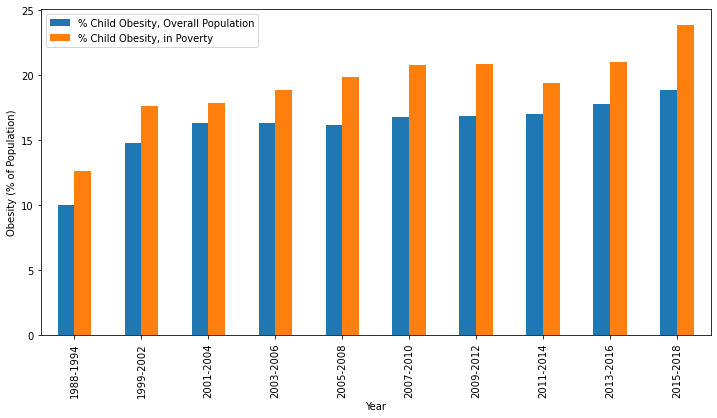

In [22]:
child_obesity_with_poverty_level = child_obesity_with_poverty_df.plot(kind = "bar", figsize = (12, 6))
child_obesity_with_poverty_level.set_xticklabels(child_obesity_with_poverty_df["year"], rotation = "vertical")
plt.xlabel("Year")
plt.ylabel("Obesity (% of Population)")
plt.savefig("Images/child_obesity_v_poverty.png")

In [2]:
poverty_csv = "poverty_stats/poverty_csv"

poverty_data = pd.read_csv(poverty_csv)

poverty_data.head()

,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
1,2004,0,US,United States,12.7,"44,334","8,430,886",16.2
2,2005,0,US,United States,13.3,46242,8765541,17.0
3,2006,0,US,United States,13.3,48451,8700048,16.7
4,2007,0,US,United States,13.0,50740,8499844,16.4


In [56]:
poverty_data_child = poverty_data[["Year", "Poverty Percent Ages 5-17"]]
poverty_data_child

,Year,Poverty Percent Ages 5-17
0,2003,16.1
1,2004,16.2
2,2005,17.0
3,2006,16.7
4,2007,16.4
5,2008,16.5
6,2009,18.2
7,2010,19.8
8,2011,20.8
9,2012,21.0


In [57]:
year = poverty_data_child["Year"]

poverty_percent = poverty_data_child["Poverty Percent Ages 5-17"]


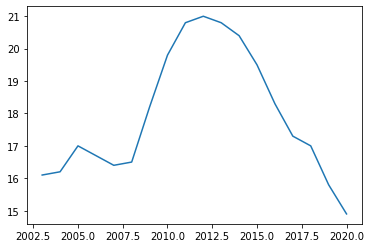

In [58]:
poverty_rates = plt.plot(year, poverty_percent)

In [63]:
youth_obesity_csv = "Resources/youth_obesity_summary.csv"
youth_obesity_df = pd.read_csv(youth_obesity_csv)
youth_obesity_df.head()

,locationdesc,2001,2003,2005,2007,2009,2011,2013,2015,2017,2019
0,Alabama,12.3,13.3,14.6,NaN,13.3,17.0,17.1,16.1,NaN,17.2
1,Alaska,NaN,11.0,NaN,11.0,11.9,11.5,12.4,14.0,13.7,14.8
2,Arizona,NaN,11.1,11.8,11.6,12.8,10.9,10.7,10.9,12.3,13.3
3,Arkansas,13.7,NaN,15.3,13.7,14.3,15.2,17.8,18.0,21.7,22.1
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,13.9,15.9


In [72]:
youth_obesity_anova = pd.read_csv("Resources/youth_obesity_anova_scores.csv")
youth_obesity_anova.head()

,Year,% Obesity
0,2019,17.2
1,2005,14.6
2,2003,13.3
3,2011,17.0
4,2009,13.3


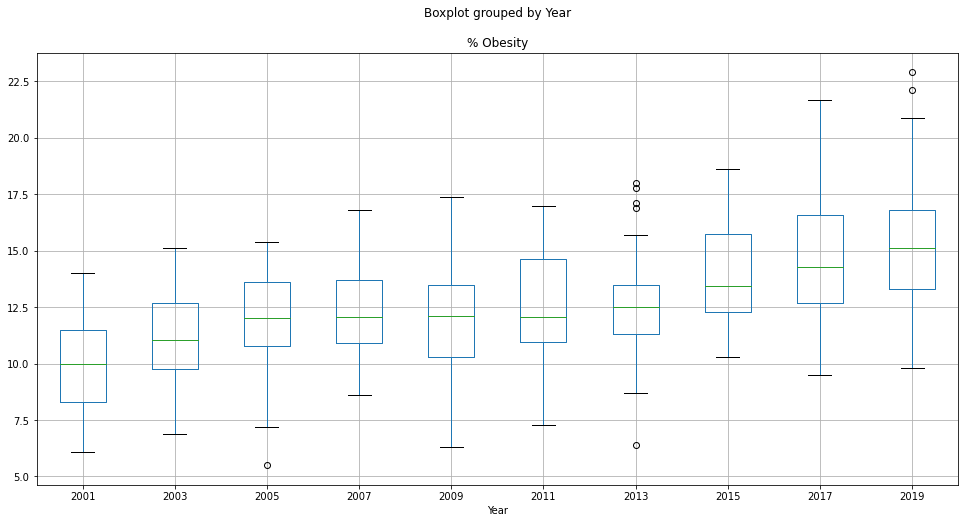

In [73]:
youth_obesity_anova.boxplot("% Obesity", by= "Year", figsize = (16, 8))

In [75]:
y2001 = youth_obesity_anova[youth_obesity_anova["Year"]==2001]["% Obesity"]
y2003 = youth_obesity_anova[youth_obesity_anova["Year"]==2003]["% Obesity"]
y2005 = youth_obesity_anova[youth_obesity_anova["Year"]==2005]["% Obesity"]
y2007 = youth_obesity_anova[youth_obesity_anova["Year"]==2007]["% Obesity"]
y2009 = youth_obesity_anova[youth_obesity_anova["Year"]==2009]["% Obesity"]
y2011 = youth_obesity_anova[youth_obesity_anova["Year"]==2011]["% Obesity"]
y2013 = youth_obesity_anova[youth_obesity_anova["Year"]==2013]["% Obesity"]
y2015 = youth_obesity_anova[youth_obesity_anova["Year"]==2015]["% Obesity"]
y2017 = youth_obesity_anova[youth_obesity_anova["Year"]==2017]["% Obesity"]
y2019 = youth_obesity_anova[youth_obesity_anova["Year"]==2019]["% Obesity"]

In [77]:
stats.f_oneway(y2001, y2003, y2005, y2007, y2009, y2011, y2013, y2015, y2017, y2019)

F_onewayResult(statistic=13.906875693349924, pvalue=4.120303786727125e-19)

In [11]:
obesity_state_scatter = pd.read_csv("Resources/youth_obesity_state_scatter.csv")
obesity_state_scatter.head()

,Year,Location,% Obesity in Adolescents
0,2019,Alabama,17.2
1,2005,Alabama,14.6
2,2003,Alabama,13.3
3,2011,Alabama,17.0
4,2009,Alabama,13.3


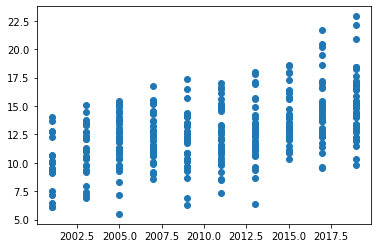

In [17]:
year_s = obesity_state_scatter["Year"]

percent_s = obesity_state_scatter["% Obesity in Adolescents"]

plt.scatter(year_s, percent_s)

In [16]:
obesity_national_scatter = pd.read_csv("Resources/youth_obesity_national.csv")

obesity_national_scatter.head()

,Year,Location,% Obesity in Adolescents
0,2001,US,10.5
1,2003,US,12.0
2,2005,US,13.0
3,2007,US,12.8
4,2009,US,11.8


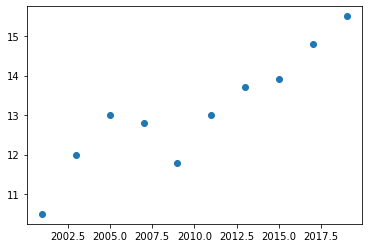

In [19]:
year_n = obesity_national_scatter["Year"]
percent_n = obesity_national_scatter["% Obesity in Adolescents"]

plt.scatter(year_n, percent_n)